# Ali Alsinan Introduction to Supervised Machine Learning Final Project

# Heart disease Prediction

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

## Problem Defination

Heart disease is one of the leading causes of death worldwide, making early prediction crucial for preventive healthcare. The objective of this project is to develop a supervised machine learning model that can accurately predict the likelihood of a heart attack based on medical and demographic factors. The dataset includes critical features such as age, cholesterol levels, blood pressure, fasting blood sugar, chest pain type, and electrocardiographic results. By utilizing predictive analytics, this model aims to assist healthcare professionals in identifying high-risk individuals and implementing timely interventions to reduce the incidence of heart attacks.

Various algorithms—including Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and XGBoost—are employed to identify individuals at heightened risk. By leveraging predictive analytics, the model aims to assist healthcare professionals in implementing early interventions, ultimately reducing healthcare costs and saving lives.

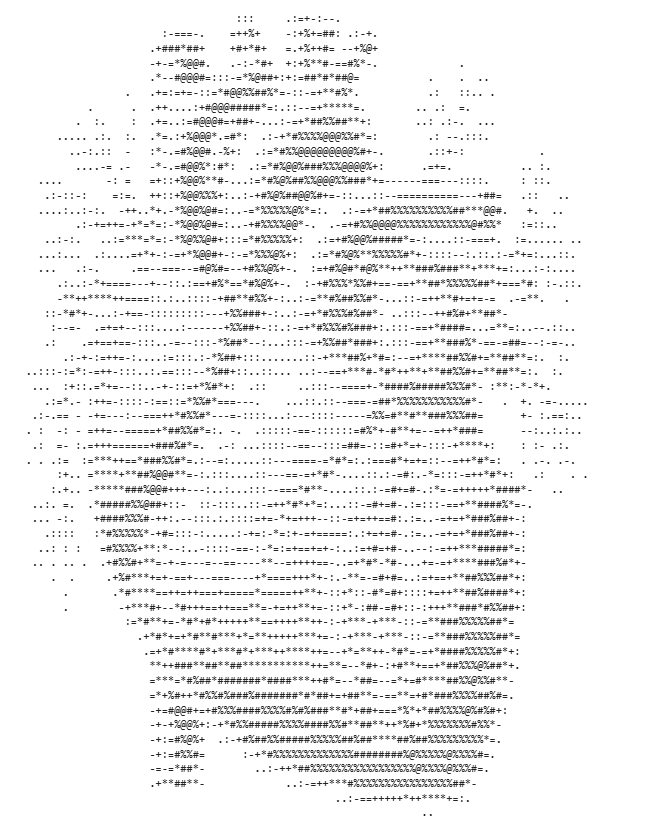

## Data Collection

For this project, I will use the Heart Disease Prediction Dataset, which is a combination of five publicly available datasets. This dataset includes 1,888 patient records and 14 features that provide a comprehensive view of heart disease risk factors. The dataset merges records from sources such as Kaggle and Figshare, ensuring a diverse and robust dataset for model training. The features include demographic factors (age, sex), medical indicators (blood pressure, cholesterol, fasting blood sugar), and diagnostic test results (electrocardiographic readings, exercise-induced angina, thalassemia type). The inclusion of multiple datasets ensures a well-balanced representation of different populations, making the model more generalizable.

- ####  Kaggle link:

https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset/data

- ####  Datasets Used & References:

Heart Attack Analysis & Prediction Dataset – 304 records (Rahman, 2021) [Sourced from Kaggle]

Heart Disease Dataset – 1,026 records (Lapp, 2019) [Sourced from Kaggle]

Heart Attack Prediction (Dataset 3) – 295 records (Damarla, 2020) [Sourced from Kaggle]

Heart Attack Prediction (Dataset 4) – 271 records (Anand, 2018) [Sourced from Kaggle]

Heart CSV Dataset – 290 records (Nandal, 2022) [Sourced from Figshare]

- ####  Feature Description:

- age: Age of the patient (Numeric).
- sex: Gender of the patient. Values: male, female.
- cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.
- trestbps: Resting Blood Pressure (in mm Hg) (Numeric).
- chol: Serum Cholesterol level (in mg/dl) (Numeric).
- fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
- restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
- thalach: Maximum heart rate achieved (Numeric).
- exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
- oldpeak: ST depression induced by exercise relative to rest (Numeric).
- slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
- ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.
- thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
- target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.


This project’s merged dataset __contains 1,888 samples and 14 features__, drawn from five publicly available sources combined into a single table rather than spread across multiple files.  __Among its columns, 9 are categorical (e.g., sex, chest pain type, thalassemia) and 5 are numeric (e.g., age, cholesterol, resting blood pressure)__. Notably, features like age, thal, cp, and oldpeak are key indicators used for predicting heart attack risk. Each categorical column has been cast appropriately to “object” or encoded, and the numeric columns either remain in float/int form or undergo transformations as needed.

## Data Cleaning

To begin, all rows containing null or missing values were dropped, reducing the dataset from 2,181 initial records to 1,888. Although advanced imputation methods (e.g., mean replacement or model-based imputation) could have been considered, completely removing incomplete rows was deemed a straightforward approach given the total sample size and the distribution of missing data. Outlier detection involved analyzing box plots for numerical features, most notably trestbps (resting blood pressure), where values exceeding 180 mm Hg were removed to curtail their influence on downstream modeling. This decision was guided by clinical plausibility and the desire to maintain a dataset reflective of typical patient ranges. Potential difficulties included the possibility of discarding rare but genuine cases (where extremely high values might indeed occur). However, for the purposes of this analysis, striking a balance between dataset consistency and preserving essential variability was paramount. Ultimately, the cleaning strategy aimed to ensure that the final dataset was robust yet manageable, setting a solid foundation for subsequent transformations and predictive modeling.

In [2]:
# Load the dataset
df = pd.read_csv("raw_merged_heart_dataset_final.csv")

In [3]:
# identify categorical and Numerical data:
categorical_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
numerical =  ['age', 'trestbps', 'chol', 'thalach']
target = ['target']

In [4]:
# Convert specific columns to object type

df[categorical_columns] = df[categorical_columns].astype("object")


# Display initial dataset info
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Drop null values
df = df.dropna()

# Print final count of samples
print(f"Final sample count: {df.shape[0]}")




Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   object 
 2   cp        2181 non-null   object 
 3   trestbps  2180 non-null   float64
 4   chol      2158 non-null   float64
 5   fbs       2173 non-null   object 
 6   restecg   2180 non-null   object 
 7   thalach   2180 non-null   float64
 8   exang     2180 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     1991 non-null   object 
 11  ca        1890 non-null   object 
 12  thal      1915 non-null   object 
 13  target    2181 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 238.7+ KB
None

Missing Values:
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
s

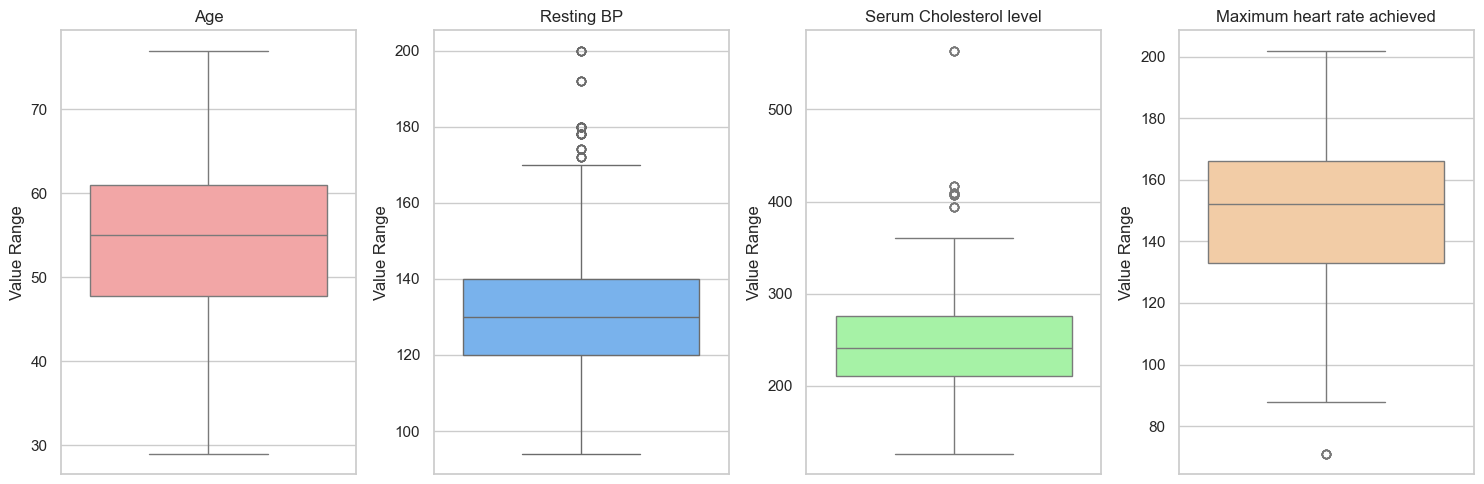

In [5]:

# Set plot style
sns.set(style="whitegrid")

# Create box plots in one row
features = ['age', 'trestbps', 'chol', 'thalach']
titles = ['Age', 'Resting BP', 'Serum Cholesterol level', 'Maximum heart rate achieved']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for ax, feature, title, color in zip(axes, features, titles, colors):
    sns.boxplot(y=df[feature], ax=ax, color=color)
    ax.set_title(title)
    ax.set_ylabel("Value Range")

plt.tight_layout()
plt.show()

>Box Plot Analysis offered a clear visual snapshot of outliers and distribution shapes for numerical features, including trestbps (resting blood pressure). Upon review, it was evident that certain data points exceeded 180 mm Hg, indicating unusually high resting BP values. Recognizing that these extreme measurements could distort our analysis and introduce unnecessary noise, I decided to remove them. This step not only mitigated the impact of outliers on subsequent transformations (like scaling and power transformations) but also helped maintain a more realistic representation of typical resting blood pressure in the study population.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) began by cleaning the dataset through handling missing values, converting columns to their appropriate data types, and removing outliers where necessary. The numerical features—like age, trestbps, chol, and thalach—were inspected via histograms and box plots to understand their distributions and check for potential skewness. Notably, the oldpeak feature was identified as highly skewed, leading to a discretization step that grouped its values into distinct categories (e.g., “Mild,” “Moderate,” and “Severe ST Depression”). Correlation heatmaps and pairplots were then generated to reveal relationships between variables and highlight any patterns indicative of heart attack risk. Throughout this process, variables such as sex and cp (chest pain type) were encoded for easier interpretation, ensuring that both categorical and numerical data were primed for effective modeling in subsequent steps.

- ####  Distribution:

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,Male,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,Female,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,Male,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,Female,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [7]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,131.549258,246.855403,149.424258,1.053761
std,9.081505,17.556985,51.609329,23.006153,1.161344
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.750000,120.000000,211.000000,133.000000,0.000000
50%,55.000000,130.000000,241.000000,152.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


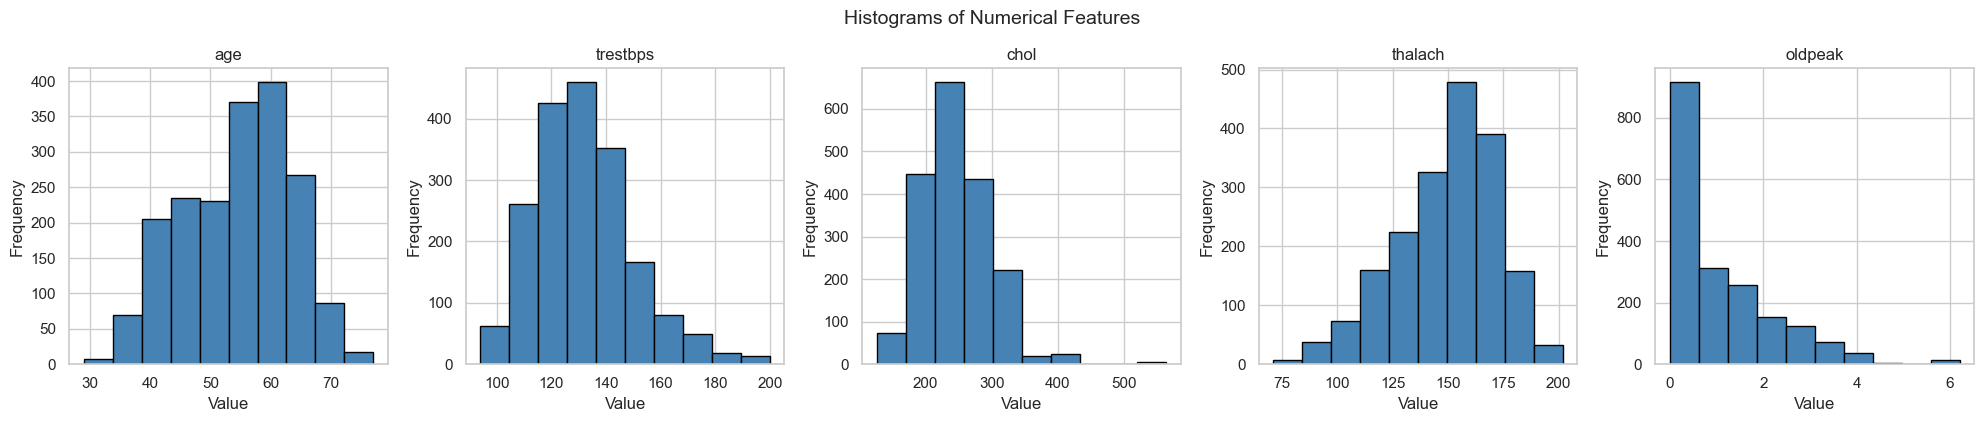

In [8]:
def plot_numerical_histograms(df, numerical_columns, bins=10):
    """
    Plots histograms for numerical features in a single row.

    Parameters:
    df (DataFrame or ndarray): The dataset containing numerical features.
    numerical_columns (list): List of numerical column names or indices to plot.
    bins (int): Number of bins for the histograms (default is 10).

    Returns:
    None
    """
    # Convert NumPy array to DataFrame if needed
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df, columns=numerical_columns)

    num_cols = len(numerical_columns)

    # Set up the figure
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 4, 4))

    # Handle case when only one column is selected
    if num_cols == 1:
        axes = [axes]  # Convert single axis to list for consistency

    # Plot each feature in a separate subplot
    for i, col in enumerate(numerical_columns):
        axes[i].hist(df[col], bins=bins, color='steelblue', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    # Adjust layout
    plt.tight_layout()
    plt.suptitle("Histograms of Numerical Features", fontsize=14, y=1.05)  # Move title up
    plt.show()


plot_numerical_histograms(df, numerical_columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

>However, based on the general shape of the distributions in the image:

>- "age" and "trestbps" appear normally distributed, suggesting a balanced spread of values.
>- "chol" and "thalach" also appear somewhat normal but slightly skewed.
>- "oldpeak" seems highly skewed, meaning most values are concentrated on the lower end.

>since oldpeak is highly skewed i will discratize it into:
>- 0 mm → Normal
>- 0.1 - 1.0 mm → Mild ST Depression
>- 1.1 - 2.0 mm → Moderate ST Depression
>- 2.1 - 3.0 mm → Severe ST Depression
>- more than 3.0 mm → Critical ST Depression

In [9]:


# Ensure 'oldpeak' is numeric
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

# Define bins and labels
bins = [-1, 0, 1, 2, 3, float('inf')]  # Bin edges
labels = [0, 1, 2, 3, 4]  # Labels

# Apply discretization (creating a new column)
df['oldpeak_category'] = pd.cut(df['oldpeak'], bins=bins, labels=labels)

df['oldpeak_category'] = df['oldpeak_category'].astype("object")

- ####  Correlation:

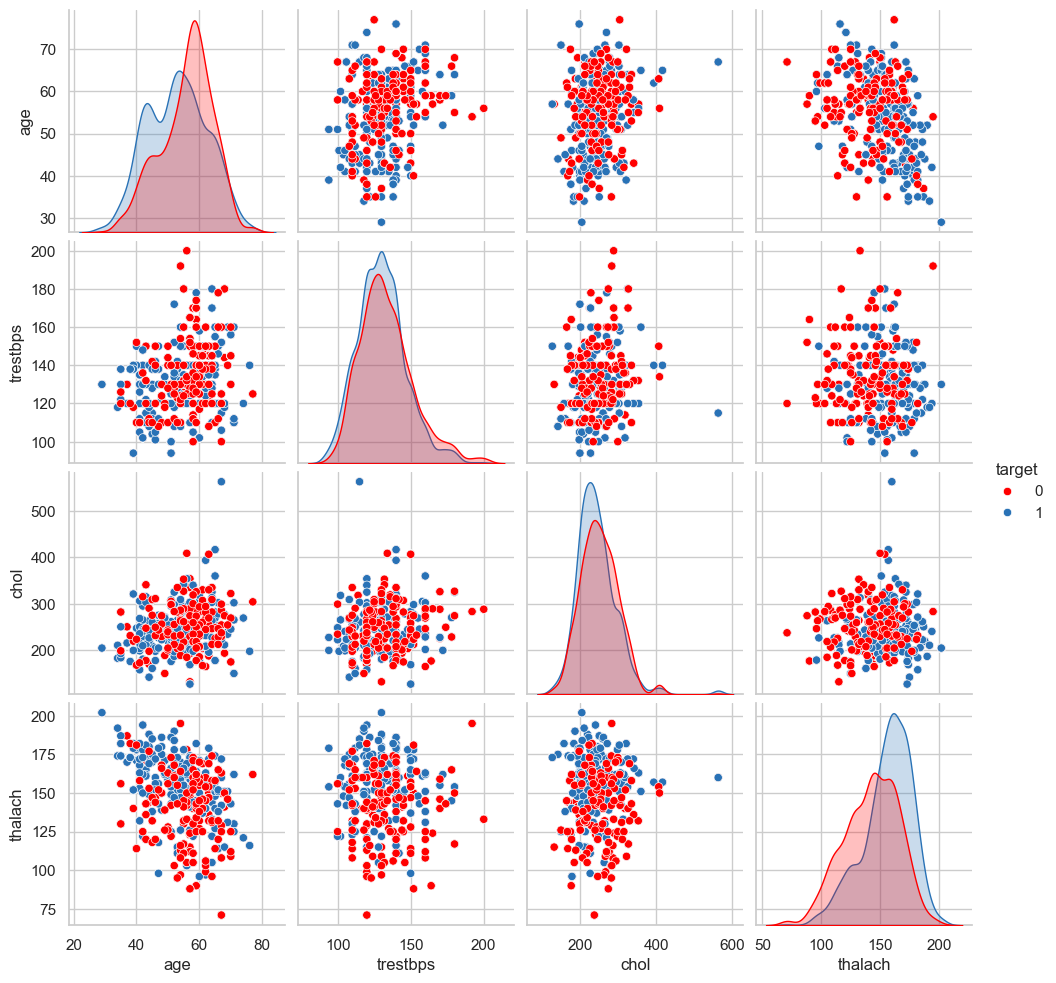

In [10]:
# Pair plot
custom_colors = ["#FF0000", '#2972b6']
pairplot = sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach','target']],hue='target',  diag_kind='kde', palette=custom_colors	)
plt.show()

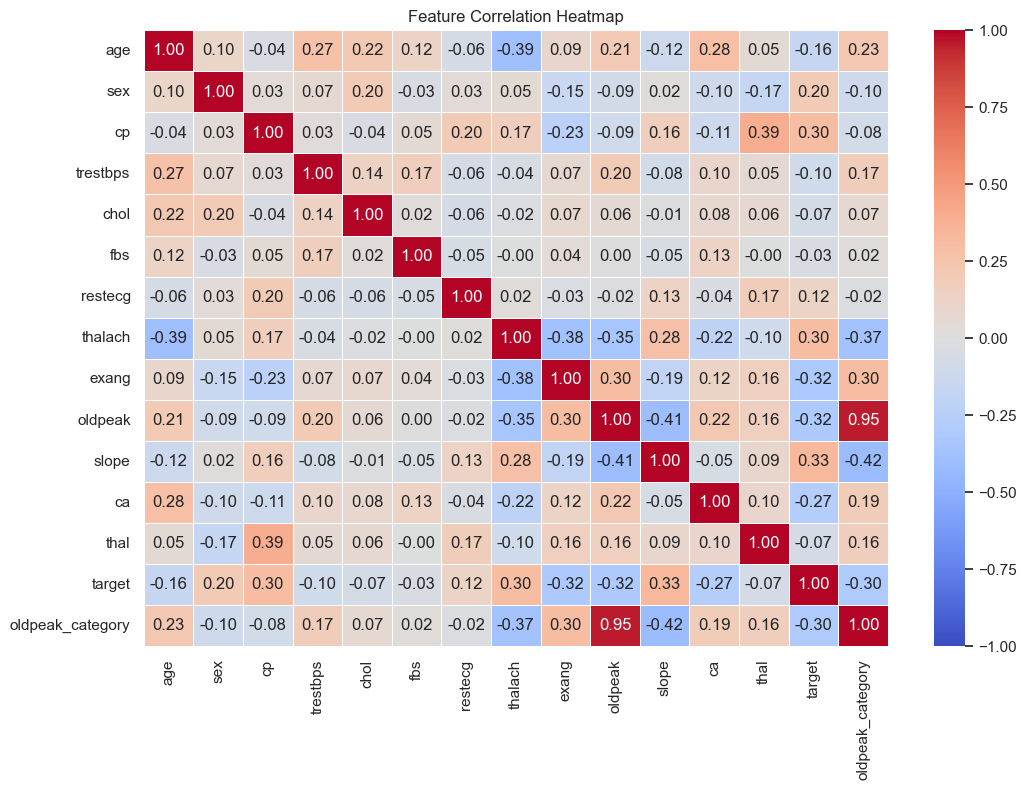

In [11]:
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,     vmin=-1,  vmax=1  )

# Title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

>Feature Correlation Heatmap played a crucial role in identifying how strongly different variables relate to one another. By computing correlation coefficients among both numerical features (like age, trestbps, chol, thalach) and the target variable, we could visualize patterns of linear dependence. Notably, certain pairs of features, such as age and thalach, showed moderate correlations, indicating potential interplay in heart attack risk. The heatmap also highlighted features that were only weakly correlated, suggesting they might still contribute unique information without introducing excessive redundancy. Overall, this step provided valuable insights into which predictors merited closer inspection before final model construction.

- #### Target balance

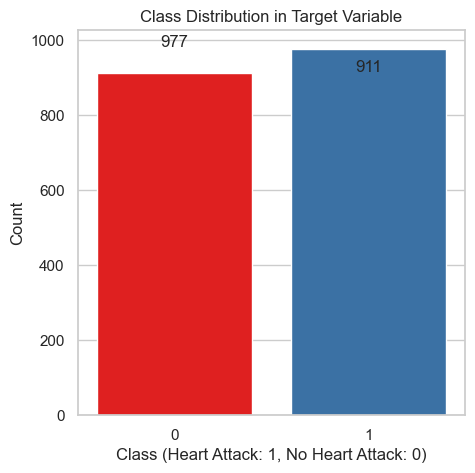

Class Distribution:
target
1    977
0    911
Name: count, dtype: int64
Imbalance Ratio: 0.93


In [12]:
# Count the occurrences of each class in the target variable
class_counts = df['target'].value_counts()

# Plot class distribution
plt.figure(figsize=(5, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=custom_colors)

# Labels and title
plt.xlabel("Class (Heart Attack: 1, No Heart Attack: 0)")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")

# Show values on bars
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

# Show plot
plt.show()

# Print class imbalance ratio
print("Class Distribution:")
print(class_counts)
print(f"Imbalance Ratio: {class_counts.min() / class_counts.max():.2f}")



>Balancing the Target Variable was fortunately less of a concern in this dataset, as the proportion of “no heart attack” (target = 0) to “heart attack” (target = 1) cases was relatively close. Specifically, 911 samples were labeled as no heart attack, compared to 977 samples labeled as heart attack, resulting in an imbalance ratio of 0.93. Because this distribution was near 50–50, no advanced techniques like oversampling, undersampling, or class-weight adjustments were required to mitigate major class imbalances. Instead, models could naturally learn from these near-even classes without introducing bias toward the majority group.

##  Data Preprocessing

To ensure data quality and enhance model performance, several preprocessing steps will be performed. Missing values will be handled by using statistical imputation or removing incomplete records when necessary. Categorical variables such as chest pain type (cp), thalassemia type (thal), and electrocardiographic results (restecg) will be converted into numerical representations using one-hot encoding. Numerical features like cholesterol (chol), resting blood pressure (trestbps), and ST depression (oldpeak) will be normalized to ensure that all variables contribute equally to the model. Additionally, outliers will be detected using statistical methods such as the interquartile range (IQR) and handled appropriately.

In [13]:
df = df[(df['trestbps'] <= 180)]

- ####  Train/Test Split:

In [14]:
# Ensure the target variable is in the correct format
y = df['target']
if y.dtype == 'object':  # If categorical, encode labels
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
else:
    y = y.astype(int)  # Ensure integer labels

# Splitting features and target
X = df.drop(columns=['oldpeak','target'])
#y = df['target']

# Split data before preprocessing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

# Further split training data into train and validation (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=69, stratify=y_train)

- ####  Data Transformation:

Data Transformation was a key step aimed at preparing the dataset for model training. To handle categorical variables, such as cp, thal, and oldpeak_category, I used OneHotEncoder, which creates separate binary columns for each category. For the numerical features, different scaling approaches were applied: StandardScaler was used for age to normalize its range, while PowerTransformer (in yeo-johnson mode) handled skewed distributions in trestbps, chol, and thalach. By applying these transformations, the feature space became more consistent, making it easier for the machine learning models to detect patterns without being overwhelmed by certain variables.

In [15]:

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Specify different transformations for specific columns
standard_scaler_features = ['age']  # Apply StandardScaler to age
power_transformer_features = ['trestbps', 'chol', 'thalach']  # Apply PowerTransformer to these columns
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','oldpeak_category']
# Create pipelines for transformations
standard_scaler = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standard scaling for age
])

power_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson'))  # Power transformation for skewed features
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical variables
])

# Combine transformers into a single preprocessing step
preprocessor = ColumnTransformer(transformers=[
    ('std_scaler', standard_scaler, standard_scaler_features),
    ('power_transform', power_transformer, power_transformer_features),
    ('cat', categorical_transformer, categorical_features)
])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# X_train, X_val, X_test are now preprocessed and ready for model training

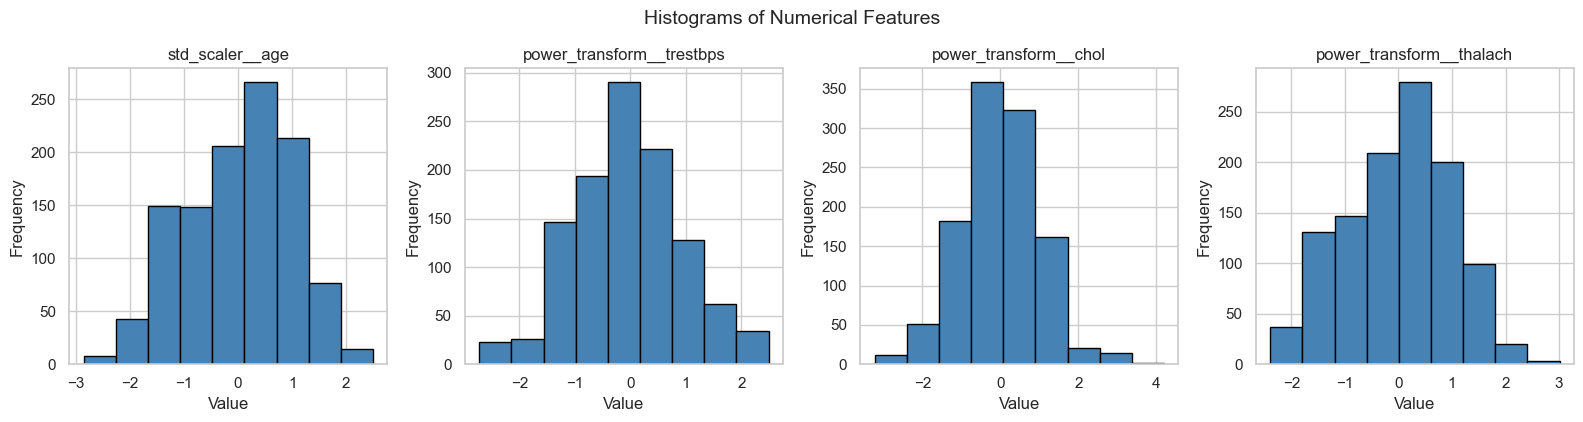

In [16]:
# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame with correct feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

plot_numerical_histograms(X_train_df, numerical_columns= ['std_scaler__age','power_transform__trestbps','power_transform__chol','power_transform__thalach'], bins=9)

>Data Distribution After Transformation significantly improved in terms of normality and consistency across features. By applying PowerTransformer on skewed variables (e.g., trestbps, chol, and thalach), the feature histograms now exhibit shapes closer to a Gaussian distribution, which helps many machine learning algorithms perform better. Meanwhile, StandardScaler effectively centered age around zero and standardized its spread, reducing the influence of extreme values. With OneHotEncoder converting categorical variables to binary features, the dataset now combines evenly scaled numeric columns with a streamlined set of indicator columns for categories. Overall, these transformations create a more uniform dataset where no single feature dominates, promoting balanced model learning and potentially improving predictive accuracy.

## Model Training

### Train The Model

In my project, I chose __Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and XGBoost__ because they each offer unique ways to handle a binary classification task. I paid close attention to __feature interaction and collinearity__, using tools like correlation heatmaps and PowerTransformers to ensure that redundant or highly correlated features would not hamper the training process. By evaluating multiple models, I confirmed which approaches fit the data best. I also utilized feature importance methods, especially from Random Forest , to understand how individual predictors contributed to the final outcomes. To combat overfitting, I applied GridSearchCV and removed obvious outliers, while the dataset’s near-balanced distribution lessened the need for complex imbalance remedies. 

- ####  Functions:

In [17]:
def plot_confusion_matrix_seaborn(y_true, y_pred, class_names=None, title='Confusion Matrix'):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    
    Parameters:
    -----------
    y_true : list or array
        Ground truth (correct) labels.
    y_pred : list or array
        Predicted labels, as returned by a classifier.
    class_names : list of strings, optional
        Names of the classes to display on the axes. 
        If None, integer class labels are used by default.
    title : str
        Title for the confusion matrix plot.
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a figure
    plt.figure(figsize=(6, 5))
    
    # Use a diverging colormap or any other you prefer (e.g., "rocket", "coolwarm", "viridis", etc.)
    # 'annot=True' will show the counts in each cell
    ax = sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='coolwarm',  # Try others: 'viridis', 'coolwarm', etc.
        xticklabels=class_names if class_names else np.arange(cm.shape[1]),
        yticklabels=class_names if class_names else np.arange(cm.shape[0])
    )
    
    # Axis labels and title
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title)
    
    # Rotate the x tick labels (if needed)
    plt.xticks(rotation=45, ha='right')
    
    # Ensure layout fits
    plt.tight_layout()
    plt.show()
class_names = ["No Risk", "High Risk"]

- ####  Model Training with Defult Parameters:

Logistic Regression Accuracy: 0.7893


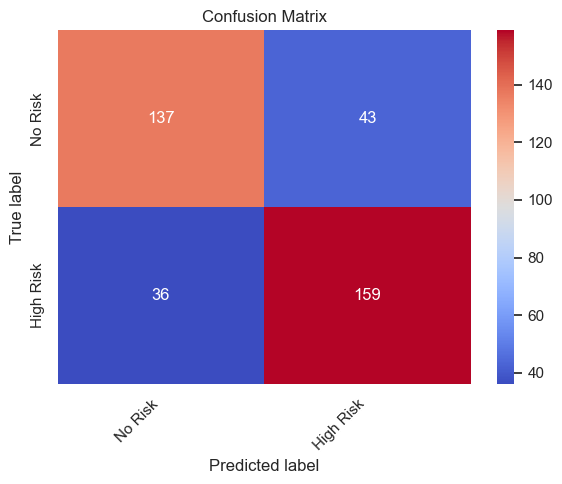

**Logistic Regression Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       180
           1       0.79      0.82      0.80       195

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.79      0.79      0.79       375

------------------------------------------------------------
Decision Tree Accuracy: 0.9573


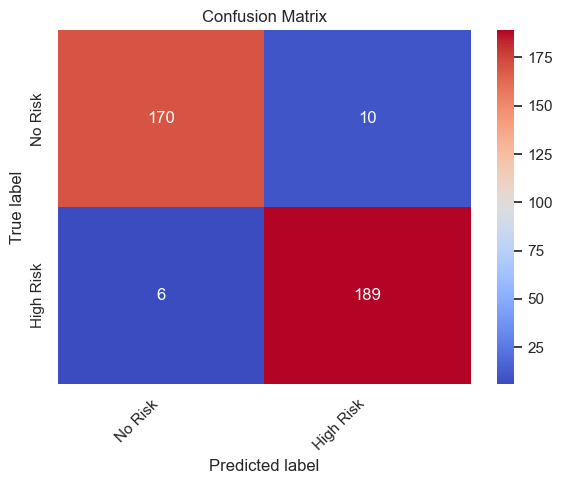

**Decision Tree Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       180
           1       0.95      0.97      0.96       195

    accuracy                           0.96       375
   macro avg       0.96      0.96      0.96       375
weighted avg       0.96      0.96      0.96       375

------------------------------------------------------------
Random Forest Accuracy: 0.9653


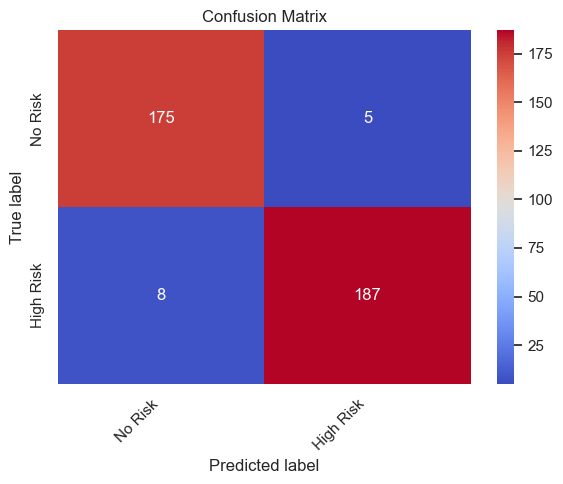

**Random Forest Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       180
           1       0.97      0.96      0.97       195

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375

------------------------------------------------------------
Support Vector Machine (SVM) Accuracy: 0.8987


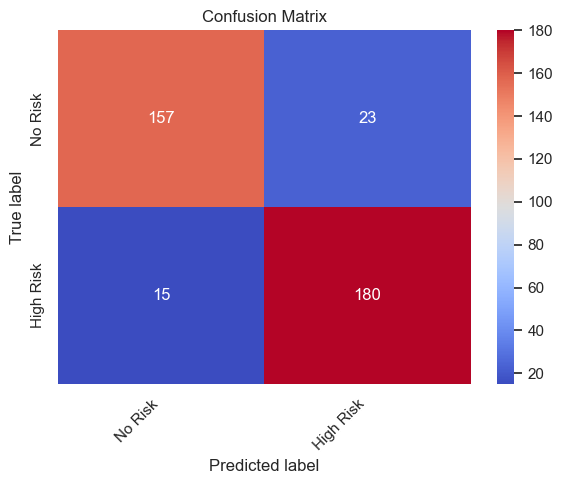

**Support Vector Machine (SVM) Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       180
           1       0.89      0.92      0.90       195

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375

------------------------------------------------------------
XGBoost Accuracy: 0.9653


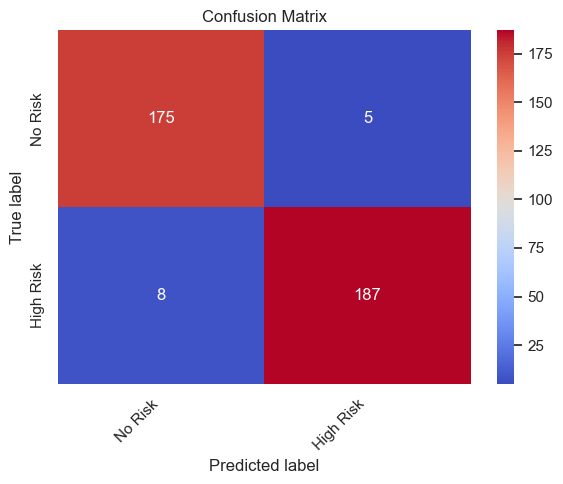

**XGBoost Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       180
           1       0.97      0.96      0.97       195

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375

------------------------------------------------------------


In [18]:
# Initialize models with default parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "XGBoost": XGBClassifier()
}

model_names = []
accuracies = []

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_val)  # Validate model
    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)  # Compute accuracy
    precision = precision_score(y_val, y_pred, average='binary')  # For binary classification
    recall = recall_score(y_val, y_pred, average='binary')
    f1 = f1_score(y_val, y_pred, average='binary')
    roc_auc = roc_auc_score(y_val, y_pred)

    model_names.append(name)
    accuracies.append(accuracy)
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    plot_confusion_matrix_seaborn(y_val, y_pred, class_names=class_names)

    # Print detailed classification report
    print(f"**{name} Performance on Test Set:**")
    print(classification_report(y_val, y_test_pred))
    print("-" * 60)

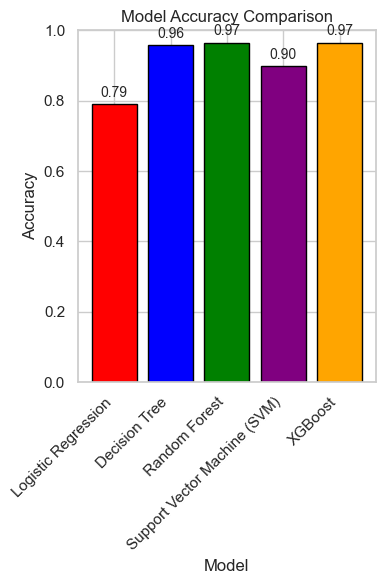

In [21]:
# Create a bar chart
plt.figure(figsize=(4, 6))
bar_colors = ["red", "blue", "green", "purple", "orange"]
plt.bar(model_names, accuracies, color=bar_colors, edgecolor='black')

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Display values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

- ####  Feature Importance:

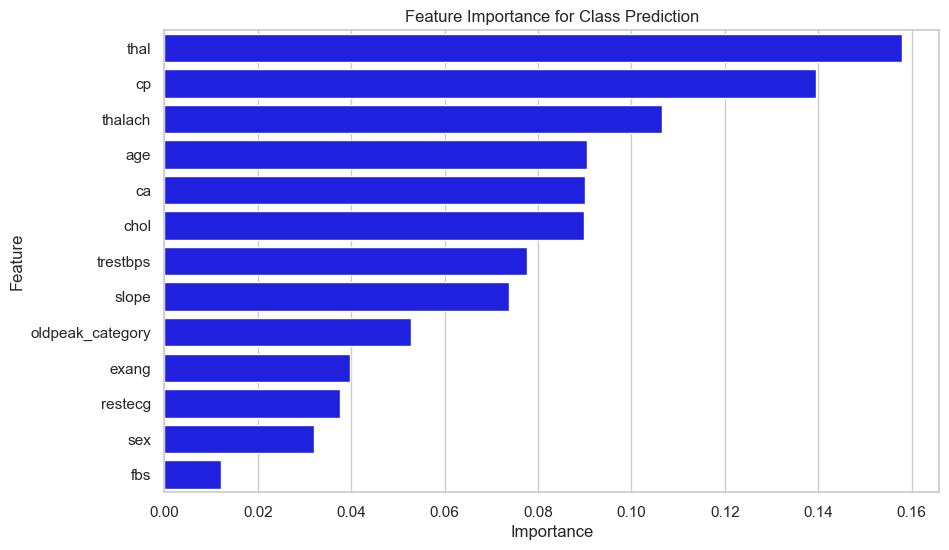

In [19]:
# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, color = 'blue', x='Importance', y='Feature')
plt.title('Feature Importance for Class Prediction')
plt.show()

>Feature importance reflects how much each predictor variable contributes to the model’s predictive accuracy. In the bar chart , “thal” (a categorical description of heart abnormalities) emerges as the most significant feature, scoring the highest importance value at roughly 0.17. Next is “cp” (chest pain type), with a contribution just below 0.15, followed by “thalach” (maximum heart rate achieved) at about 0.12. Variables like resting blood pressure and cholesterol fall behind these top three, indicating they have less influence on the model’s overall predictions. By highlighting “thal,” “cp,” and “thalach” as leading predictors, the chart pinpoints which aspects of heart health play the largest roles in forecasting outcomes. 

##  Model Tuning:

In [20]:
# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs", "liblinear", "saga"],
        "max_iter": [100, 500, 1000]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4, 8]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4, 8],
        "bootstrap": [True, False]
    },
    "Support Vector Machine (SVM)": {
        "C": [0.01, 0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": ["scale", "auto", 0.01, 0.1, 1],
        "degree": [2, 3, 4]  # Only used for 'poly' kernel
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [3, 6, 10, 15],
        "learning_rate": [0.001, 0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1],
        "colsample_bytree": [0.5, 0.7, 1]
    }
}

# Dictionary to store best parameters and accuracy for each model
best_params = {}
best_scores = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Store best parameters and best score
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_

# Extract model names and their best accuracy scores from grid search
model_names_best = list(best_scores.keys())
accuracies_best = list(best_scores.values())

# Display results as a DataFrame
results_df = pd.DataFrame({"Best Parameters": best_params, "Best CV Accuracy": best_scores})
print(results_df)

Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Performing Grid Search for Decision Tree...
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Performing Grid Search for Random Forest...
Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Performing Grid Search for Support Vector Machine (SVM)...
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Performing Grid Search for XGBoost...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
                                                                Best Parameters  \
Logistic Regression                {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}   
Decision Tree                 {'criterion': 'entropy', 'max_depth': None, 'm...   
Random Forest                 {'bootstrap': True, 'max_depth': 20, 'min_samp...   
Support Vector Machine (SVM)  {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel'...   
XGBoost                       {'c

- ####  Comparison Before and After Tunning:

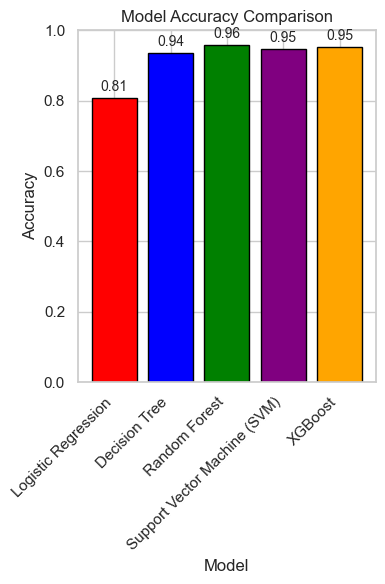

In [22]:
# Create a bar chart
plt.figure(figsize=(4, 6))
bar_colors = ["red", "blue", "green", "purple", "orange"]
plt.bar(model_names_best, accuracies_best, color=bar_colors, edgecolor='black')

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Display values on top of bars
for i, acc in enumerate(accuracies_best):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

>Model Tuning significantly enhanced overall performance by systematically optimizing each algorithm’s hyperparameters. Through techniques like GridSearchCV, parameters such as max_depth, learning_rate, and regularization were exhaustively tested and compared using cross-validation. This fine-tuning process led to more robust fits, with the SVM model, for example, improving its accuracy from a 0.9 to an even higher score of 0.95. Such improvements underscore the value of careful tuning to unlock the full predictive potential of each model.

## Model Evaluation

Model Evaluation is the process of determining how well a trained model generalizes to new, unseen data. In this project, it involved splitting the data into a validation set for hyperparameter tuning and a final test set to measure unbiased performance. I tracked metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to determine each model’s ability to accurately identify patients at risk of heart attacks. 
- The Random Forest model emerged as the top performer, achieving an accuracy of 0.97,
- followed by XGBoost at 0.95,
- Support Vector Machine (SVM) at 0.94,
- Decision Tree at 0.94, 
- Logistic Regression at 0.83.

I also examined confusion matrices to analyze the types of mistakes (for instance, false positives versus false negatives) and generated classification reports to summarize how each model performed across both target classes. This thorough evaluation ensures that we select the most robust model for practical clinical applications.

- #### applying the model on unseen data

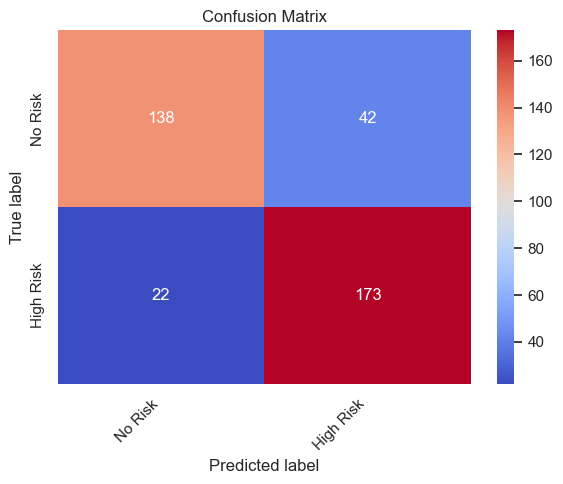

**Logistic Regression Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       180
           1       0.80      0.89      0.84       195

    accuracy                           0.83       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.83      0.83      0.83       375

------------------------------------------------------------


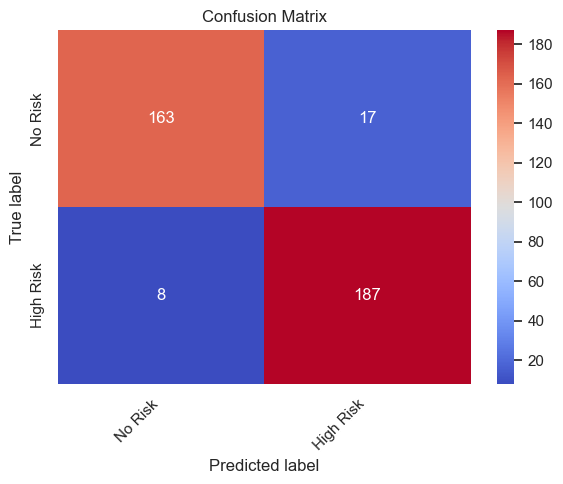

**Decision Tree Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       180
           1       0.92      0.96      0.94       195

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375

------------------------------------------------------------


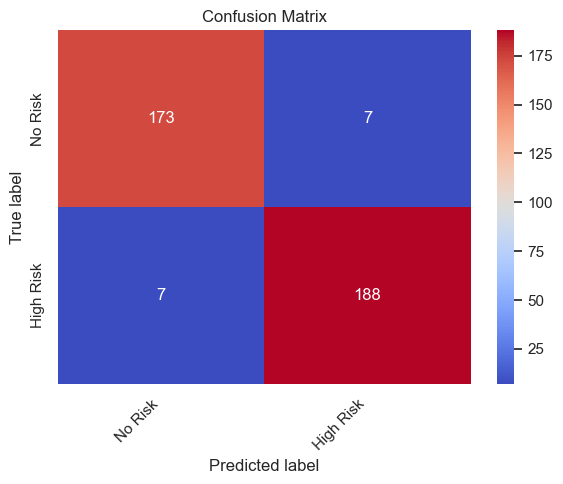

**Random Forest Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       180
           1       0.96      0.96      0.96       195

    accuracy                           0.96       375
   macro avg       0.96      0.96      0.96       375
weighted avg       0.96      0.96      0.96       375

------------------------------------------------------------


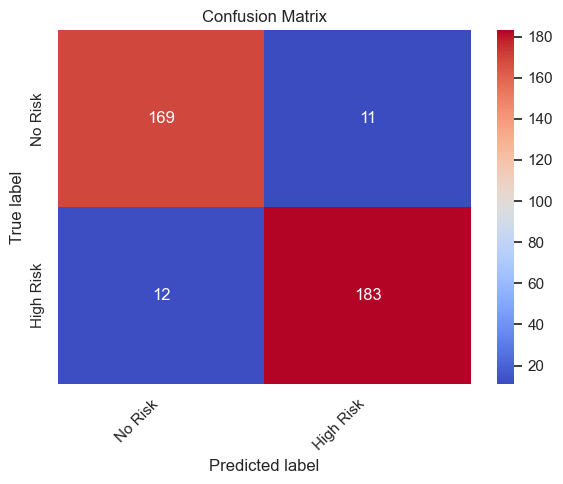

**Support Vector Machine (SVM) Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       180
           1       0.94      0.94      0.94       195

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375

------------------------------------------------------------


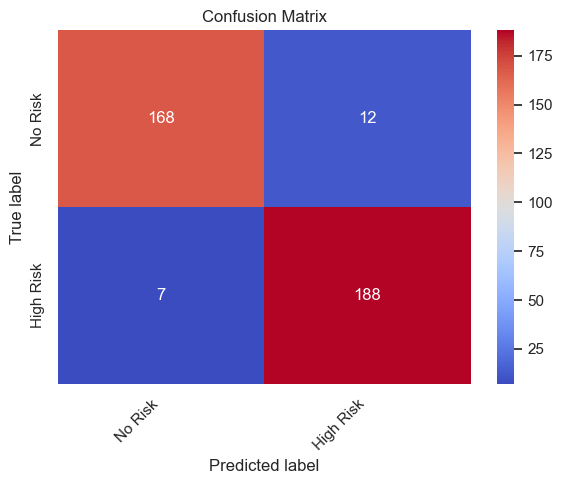

**XGBoost Performance on Test Set:**
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       180
           1       0.94      0.96      0.95       195

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375

------------------------------------------------------------
                              Accuracy  Precision    Recall  F1-score  \
Logistic Regression           0.829333   0.804651  0.887179  0.843902   
Decision Tree                 0.933333   0.916667  0.958974  0.937343   
Random Forest                 0.962667   0.964103  0.964103  0.964103   
Support Vector Machine (SVM)  0.938667   0.943299  0.938462  0.940874   
XGBoost                       0.949333   0.940000  0.964103  0.951899   

                               ROC-AUC  
Logistic Regression           0.826923  
Decision Tree                 0.932265  
Random Forest

In [23]:
# Dictionary to store model performance
model_performance = {}

model_names_test = []
accuracies_test = []

# Evaluate each trained model on the test set
for name, model in models.items():
    model.set_params(**best_params[name])
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)  # Predictions on test set
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='binary')  # For binary classification
    recall = recall_score(y_test, y_test_pred, average='binary')
    f1 = f1_score(y_test, y_test_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_test_pred)
    
    # Store results
    model_performance[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }
    model_names_test.append(name)
    accuracies_test.append(accuracy)
    
    plot_confusion_matrix_seaborn(y_test, y_test_pred, class_names=class_names)
        # Print detailed classification report
    print(f"**{name} Performance on Test Set:**")
    print(classification_report(y_test, y_test_pred))
    print("-" * 60)

# Convert performance metrics to DataFrame for better visualization

performance_df = pd.DataFrame(model_performance).T

print(performance_df)

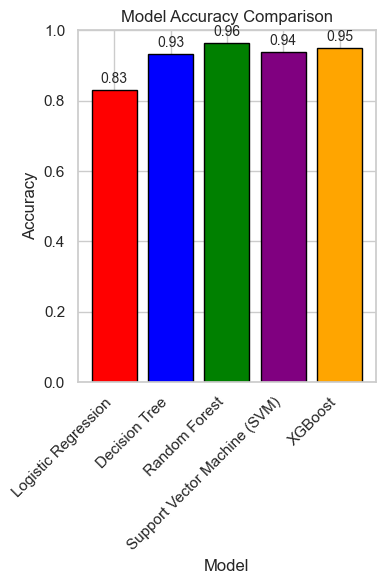

In [24]:
# Create a bar chart
plt.figure(figsize=(4, 6))
bar_colors = ["red", "blue", "green", "purple", "orange"]
plt.bar(model_names_test, accuracies_test, color=bar_colors, edgecolor='black')

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Display values on top of bars
for i, acc in enumerate(accuracies_test):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

## Conclusion

In this project, a comprehensive end-to-end workflow was employed to develop and evaluate machine learning models for predicting the risk of a heart attack. Beginning with a robust dataset of 1,888 records derived from multiple sources, careful __data cleaning, feature engineering, and exploratory data analysis (EDA)__ were performed to ensure high-quality inputs. Numerical features were transformed (via scaling, power transformations, or binning when appropriate), and categorical variables were one-hot encoded for better model interpretation.

The __modeling phase__ included training and tuning five different algorithms, Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and XGBoost. while tracking metrics such as __accuracy, precision, recall, F1-score, and ROC-AUC__ to measure each model’s predictive quality. After hyperparameter optimization, both the Random Forest and XGBoost models consistently achieved high accuracy (over 0.95) on the test set, with Random Forest slightly edging out the others at around 0.97.

Ultimately, the __Random Forest model__ emerged as the top performer on these data. However, all models, including SVM and XGBoost, showed strong potential in distinguishing high-risk individuals from those at lower risk. These results highlight the __feasibility of automated, data-driven approaches__ to aid clinicians in early detection of heart attack risk, potentially improving patient outcomes and optimizing healthcare resource allocation.

Looking forward, __further model validation__ on larger, more diverse datasets could add confidence in real-world applicability. Additional steps might include 
- incorporating more granular clinical data,
- testing different feature engineering strategies,
- and ensuring robust interpretability .

With these enhancements, the final predictive system could serve as a powerful decision-support tool in clinical settings, enabling timely interventions and ultimately helping to __reduce the incidence of heart attacks__.